In [38]:
# 모듈 및 데이터 로드
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()

# x, y 데이터 생성
X = data.data

# 악성을 1, 양성을 0으로
y = 1 - data.target

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10]

# 로지스틱 회귀 모델 생성
model_lor = LogisticRegression(solver = 'lbfgs')
model_lor.fit(X,y)
y_pred = model_lor.predict(X)

C:\Users\gyw78\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


* 오차 행렬(혼동 행렬) 생성

In [39]:
# 종속 변수와 예측 결과로 혼동 행렬 생성
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[337,  20],
       [ 30, 182]], dtype=int64)

* 정확도

In [40]:
from sklearn.metrics import accuracy_score
print('정확도는 {0:.4f}'.format(accuracy_score(y, y_pred)))

정확도는 0.9121


* 정밀도

In [23]:
from sklearn.metrics import precision_score
print('정밀도는 {0:.4f}'.format(precision_score(y, y_pred)))

정밀도는 0.9010


* 재현율

In [24]:
from sklearn.metrics import recall_score
print('재현율은 {0:.4f}'.format(recall_score(y, y_pred)))

재현율은 0.8585


* F1 score

In [25]:
from sklearn.metrics import f1_score
print('f1 스코어는 {0:.4f}'.format(f1_score(y, y_pred)))


f1 스코어는 0.8792


* 예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.

In [44]:
from sklearn.preprocessing import Binarizer
pred_proba = model_lor.predict_proba(X)
pred_proba1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold = 0.1)
y_pred2 = binarizer.transform(pred_proba1)

In [45]:
# y와 y의 혼동행렬, 정확도, 정밀도, 재현율, f1 
print(confusion_matrix(y,y_pred2))
# 정확도
print(accuracy_score(y, y_pred2))
# 정밀도
print(precision_score(y,y_pred2))
# 재현율
print(recall_score(y,y_pred2))
# f1 score
print(f1_score(y, y_pred2))

[[267  90]
 [  6 206]]
0.8312829525483304
0.6959459459459459
0.9716981132075472
0.8110236220472441


* ROC 곡선 시각화

In [37]:
from sklearn.metrics import roc_curve
probas = model_lor.predict_proba(X)

fpr, tpr, thresholds = roc_curve(y, probas[:,1])

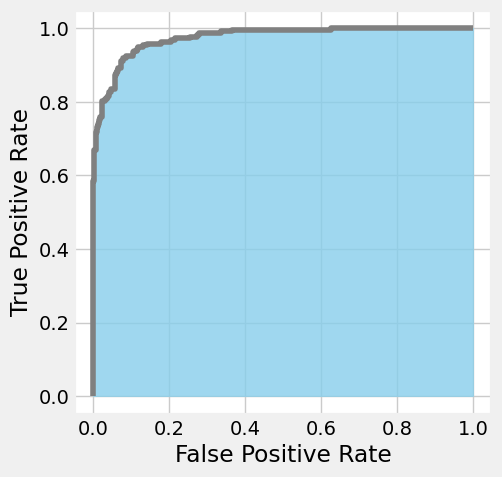

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
fig.set_size_inches(4.8, 5)
ax.step(fpr, tpr, 'gray')
ax.fill_between(fpr, tpr, 0, color='skyblue', alpha=0.8)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_facecolor('xkcd:white')
plt.show()

* ROC AUC 값

In [47]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y, probas[:,1])

0.9741424871835527